## Stepwise Multinomial Linear Regression

In [206]:
## Find the link for this here: https://github.com/hellystia/Final-Project

### Load in Libraries

In [193]:
library("ggplot2")
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("corrplot")

Warning message:
"package 'corrplot' was built under R version 4.2.1"
corrplot 0.92 loaded



In [83]:
BikesData <- read.csv("C:/Users/Helly/Desktop/Final Project/hour.csv")

### Wrangle data for Testing.

In [35]:
## Remove the instant and dteday columns as they have too many unique values to pass assumptions.
## Remove the registered and casual counts--they will mess up the model because they ALWAYS fit perfectly!

In [36]:
BikesData1 <- BikesData[ -c(1:2, 15:16) ]

### Test for Assumptions

#### Assumption of linearity

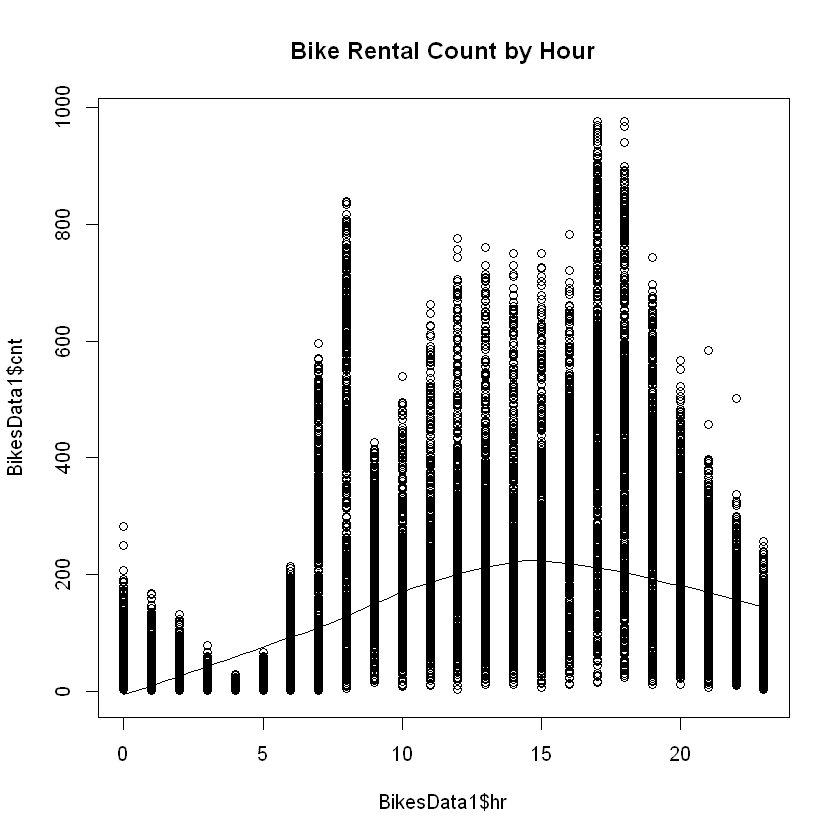

In [86]:
scatter.smooth(x=BikesData1$hr, y=BikesData1$cnt, main="Bike Rental Count by Hour")

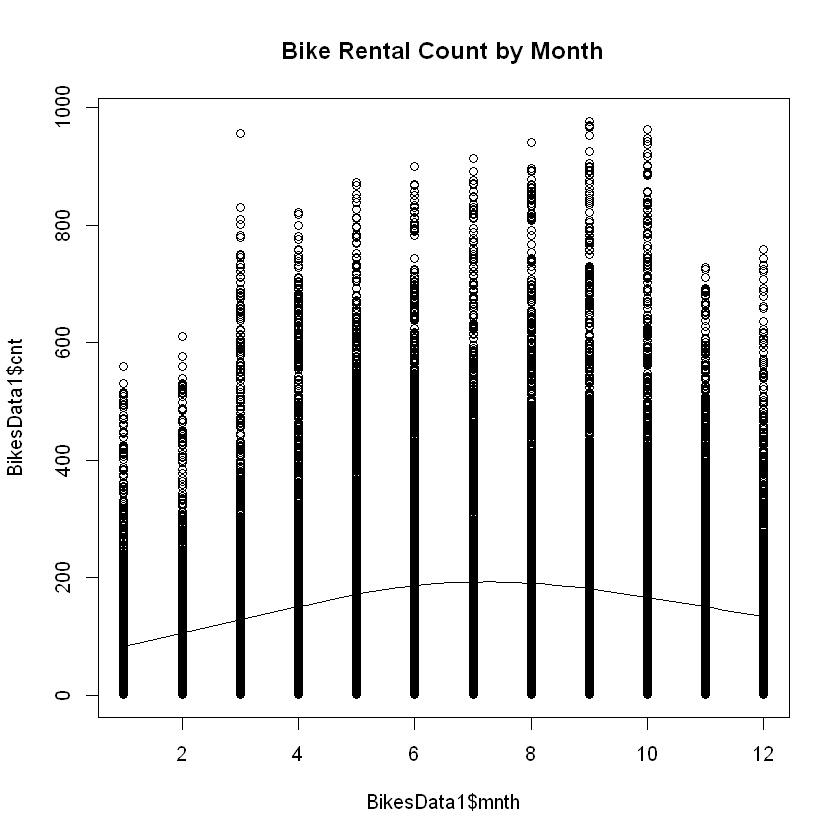

In [89]:
scatter.smooth(x=BikesData1$mnth, y=BikesData1$cnt, main="Bike Rental Count by Month")

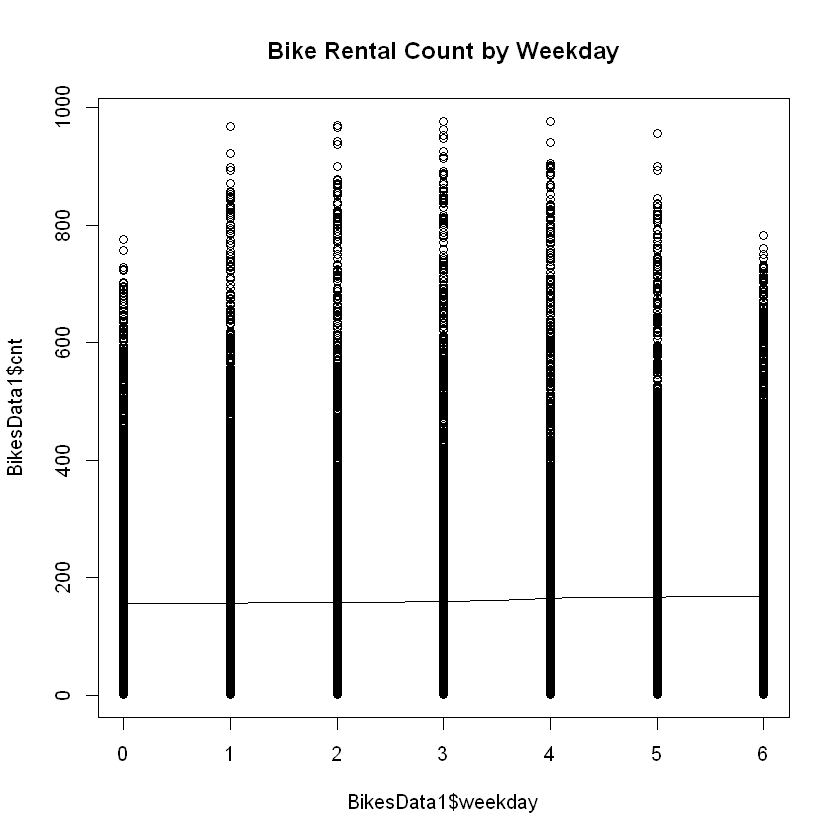

In [90]:
scatter.smooth(x=BikesData1$weekday, y=BikesData1$cnt, main="Bike Rental Count by Weekday")

In [92]:
## In these graphs, we can see that the bike rental count varies depending on which time variable we are using.
## I would not say that this is a linear relationship, as we have to too many independent variables.
## And that's why I'm doing multinomial linear regression instead of singular.

#### Assumption of Homoscedasticity

In [95]:
lmHr = lm(cnt~hr, data=BikesData1)

In [96]:
## Graphing this assumption as an initial model:

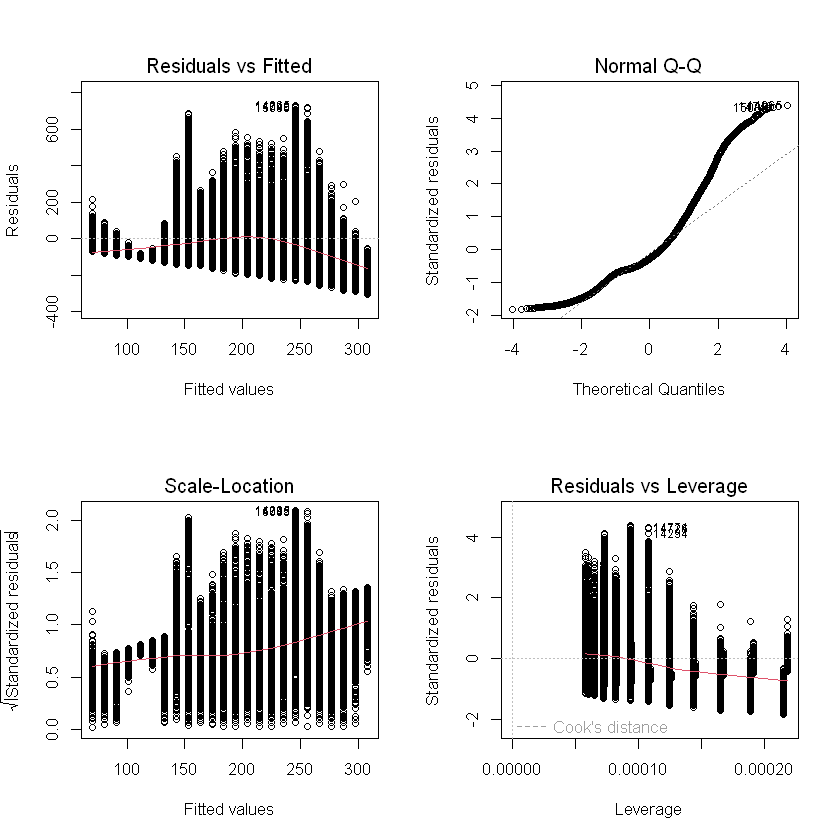

In [97]:
par(mfrow=c(2,2))
plot(lmHr)

In [98]:
## There does appear to be some variance, especially in the upper quartiles. My conclusion is that we do have some residuals
## and outliers that have not all been removed from the data in R. I know there were some days with very high rental
## counts that could potentially be skewing this data, which I also demonstrate in my Tableau visuals.

#### Trying the Breusch-Pagan Test to examine homoscedasticity.

In [99]:
lmtest::bptest(lmHr)


	studentized Breusch-Pagan test

data:  lmHr
BP = 784.54, df = 1, p-value < 2.2e-16


In [116]:
## This is significant, so this does fail the assumption of homoscedasticity.

#### Non Constant Variance

In [114]:
car::ncvTest(lmHr)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1549.313, Df = 1, p = < 2.22e-16

In [115]:
## This test examines whether the variance is "constant" (linear) or not. It is significant, so it varies non-constantly.
## Fails homo scedasticity on both counts. We can try month and weekday as well, for learning purposes.

#### Testing Month for Homoscedasticity

In [101]:
lmMnth = lm(cnt~mnth, data=BikesData1)

In [102]:
## Graphing this:

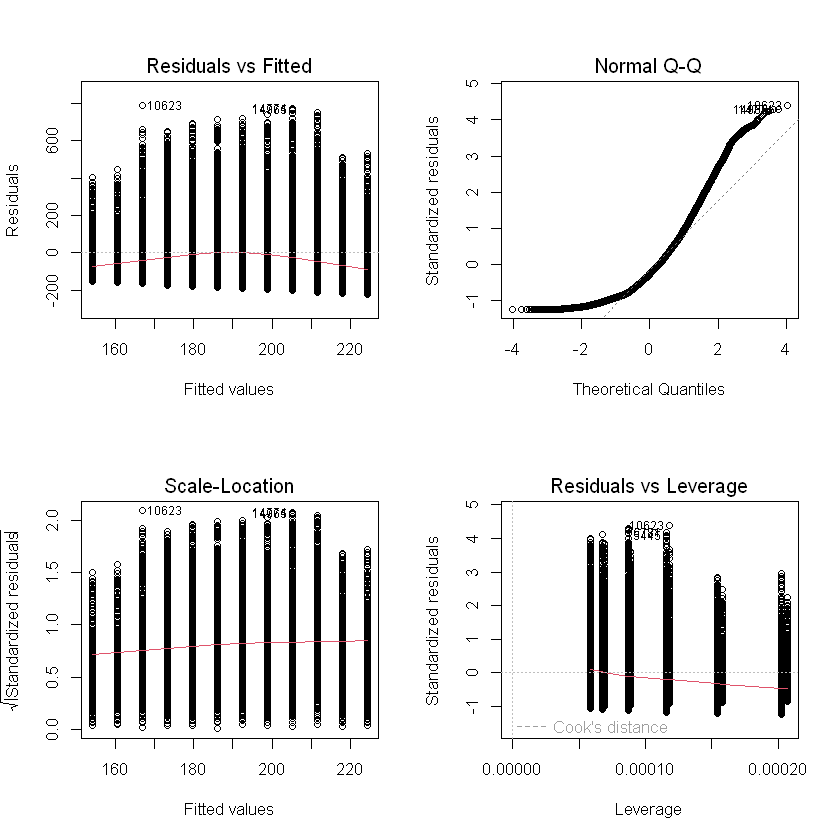

In [103]:
par(mfrow=c(2,2))
plot(lmMnth)

#### Breusch-Pagan Test

In [113]:
car::ncvTest(lmMnth)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 213.4941, Df = 1, p = < 2.22e-16

#### Non-Constant Variance Test

In [104]:
lmtest::bptest(lmMnth)


	studentized Breusch-Pagan test

data:  lmMnth
BP = 124.99, df = 1, p-value < 2.2e-16


In [ ]:
## The month variable also fails to meet the assumption of homoscedasticity. Lastly, we'll look at weekday.

In [105]:
lmWeekday = lm(cnt~weekday, data=BikesData1)

In [106]:
## Graphing this:

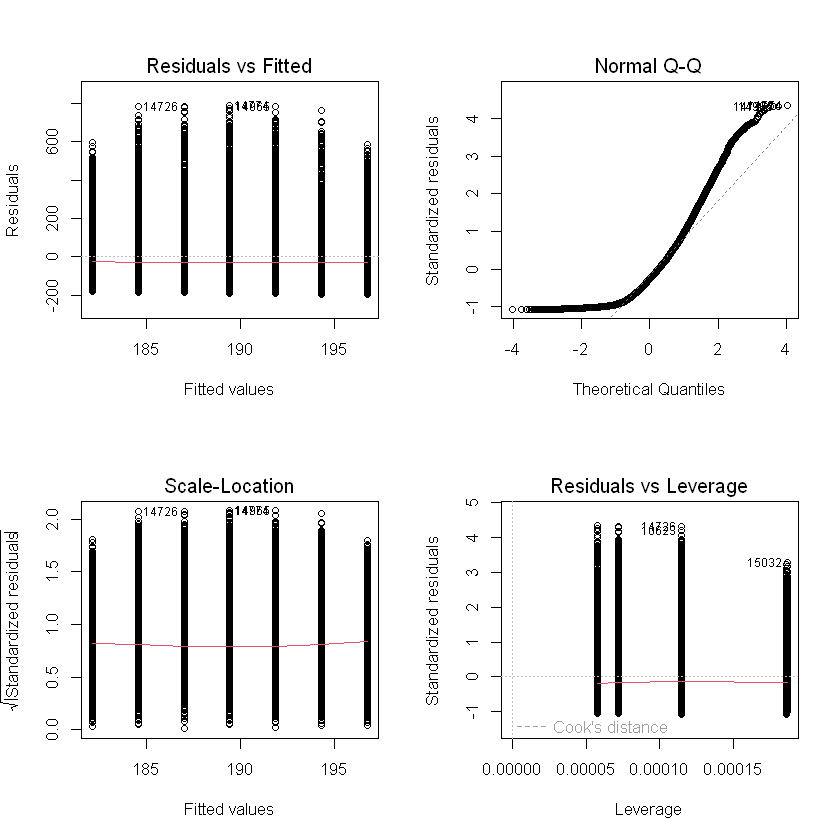

In [107]:
par(mfrow=c(2,2))
plot(lmWeekday)

#### Breusch-Pagan Test

In [108]:
lmtest::bptest(lmWeekday)


	studentized Breusch-Pagan test

data:  lmWeekday
BP = 1.7457, df = 1, p-value = 0.1864


#### Non-Constant Variance Test

In [111]:
car::ncvTest(lmWeekday)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 2.984697, Df = 1, p = 0.084055

In [109]:
## This one actually meets the assumption of Homoscedasticity. 

### What does all of this mean?

In [110]:
## If my data does not meet the assumption of homoscedasticity, that means I cannot rule out it being unequally related to other
## data. Homoscedastistic data is all related equally. Clearly, some of my variables play a bigger role than others.

### Assumption of Homogeneity of Variance

In [ ]:
## We will run a GVLMA test to see if our variance is equal. I'm guessing... no.

In [117]:
gvlma(lmHr)


Call:
lm(formula = cnt ~ hr, data = BikesData1)

Coefficients:
(Intercept)           hr  
      70.10        10.34  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmHr) 

                   Value p-value                   Decision
Global Stat        11798       0 Assumptions NOT satisfied!
Skewness            4937       0 Assumptions NOT satisfied!
Kurtosis            2752       0 Assumptions NOT satisfied!
Link Function       2923       0 Assumptions NOT satisfied!
Heteroscedasticity  1185       0 Assumptions NOT satisfied!

In [118]:
gvlma(lmMnth)


Call:
lm(formula = cnt ~ mnth, data = BikesData1)

Coefficients:
(Intercept)         mnth  
    147.861        6.363  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmMnth) 

                   Value p-value                   Decision
Global Stat         8637       0 Assumptions NOT satisfied!
Skewness            4585       0 Assumptions NOT satisfied!
Kurtosis            1452       0 Assumptions NOT satisfied!
Link Function       1018       0 Assumptions NOT satisfied!
Heteroscedasticity  1582       0 Assumptions NOT satisfied!

In [119]:
gvlma(lmWeekday)


Call:
lm(formula = cnt ~ weekday, data = BikesData1)

Coefficients:
(Intercept)      weekday  
    182.156        2.433  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmWeekday) 

                      Value  p-value                   Decision
Global Stat        7521.444 0.000000 Assumptions NOT satisfied!
Skewness           4725.115 0.000000 Assumptions NOT satisfied!
Kurtosis           1458.907 0.000000 Assumptions NOT satisfied!
Link Function         7.175 0.007393 Assumptions NOT satisfied!
Heteroscedasticity 1330.247 0.000000 Assumptions NOT satisfied!

In [120]:
## We fail to meet this assumption.

#### Outliers

In [127]:
## Cook's D

In [141]:
CooksDHr <- lm(cnt ~ hr, data = BikesData1)

In [142]:
cooksDHr1 <- cooks.distance(CooksDHr)

In [152]:
cooksDMnth <- cooks.distance(lmMnth)

In [153]:
cooksDWeekday <- cooks.distance(lmWeekday)

In [154]:
## Plot Cook's Distance with a horizontal line at 4/n to find outliers in X space

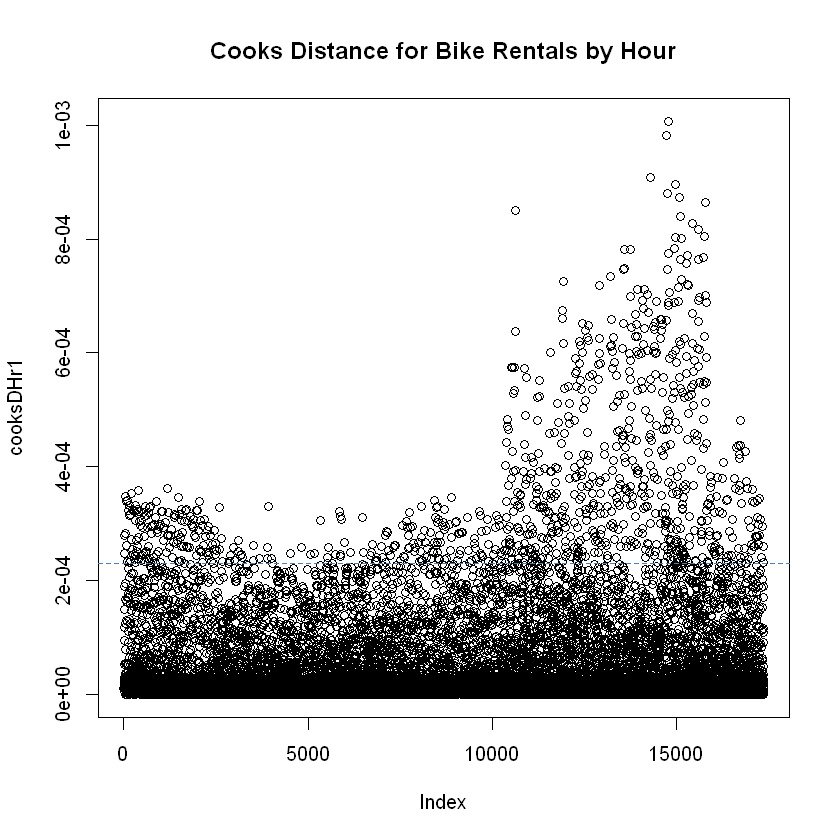

In [155]:
plot(cooksDHr1, main = "Cooks Distance for Bike Rentals by Hour")
abline(h = 4/n, lty = 2, col = "steelblue")

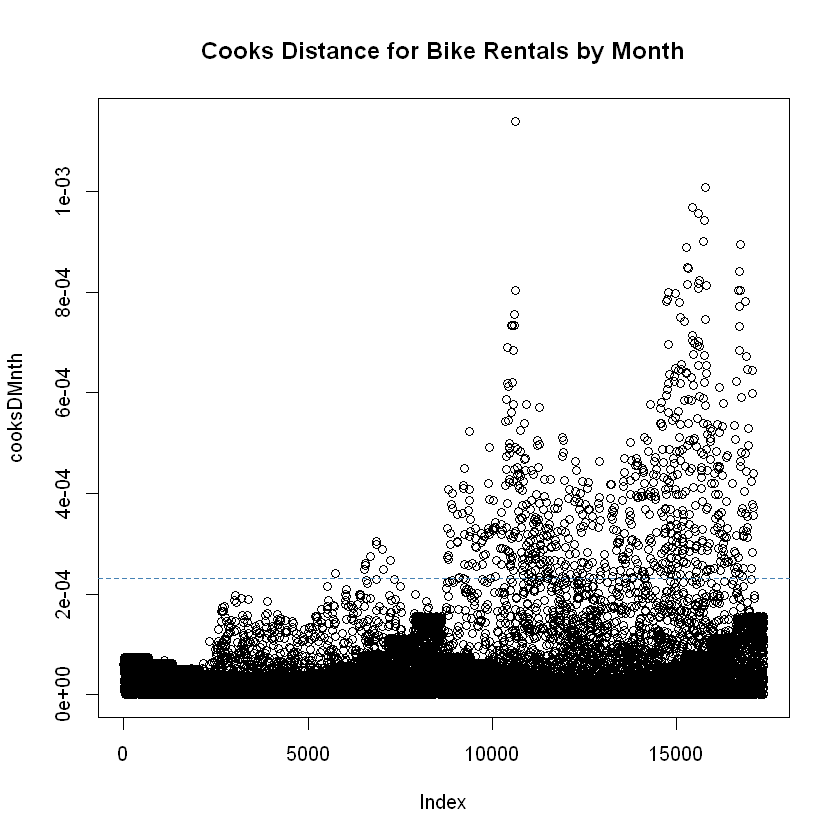

In [156]:
n <- nrow(BikesData1)
plot(cooksDMnth, main = "Cooks Distance for Bike Rentals by Month")
abline(h = 4/n, lty = 2, col = "steelblue")

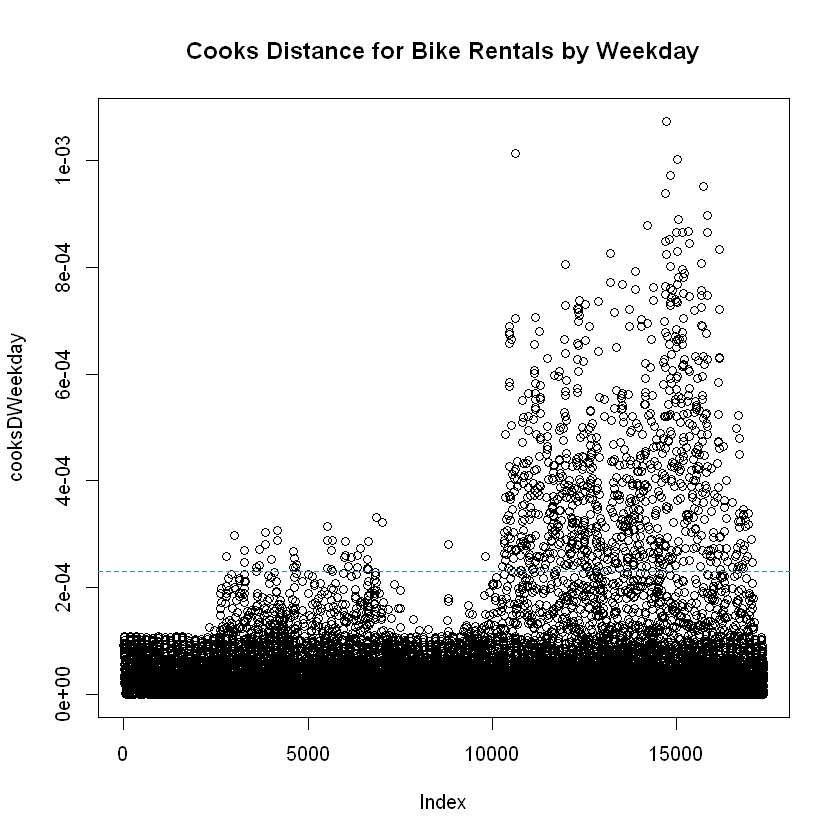

In [157]:
plot(cooksDWeekday, main = "Cooks Distance for Bike Rentals by Weekday")
abline(h = 4/n, lty = 2, col = "steelblue")

In [158]:
## The outliers are scattered about. We have far too many observations to account for everything; however,
## it is worth noting as we move forward. I believe these numbers are difficult to nail down because bike rentals
## increase over time in this dataset, likely due to factors like marketing or word-of-mouth, which aren't accounted
## for in this set, and therefore won't be accounted for in our model.

In [133]:
car::outlierTest(lmHr)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
      rstudent unadjusted p-value Bonferroni p
14965 4.382216         1.1817e-05      0.20536

In [135]:
car::outlierTest(lmMnth)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
      rstudent unadjusted p-value Bonferroni p
10623 4.390069         1.1398e-05      0.19809

In [136]:
car::outlierTest(lmWeekday)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
      rstudent unadjusted p-value Bonferroni p
14774 4.345591         1.3969e-05      0.24277

In [137]:
## None of these tests is significant for outliers in Y space.

## Regression Modeling in R

### Backwards Elimination

In [37]:
## Starting with backwards elimination, then we will move on to forwards, then hybrid. 

In [38]:
BackwardsModel = lm(cnt ~., data = BikesData1)

In [39]:
summary(BackwardsModel)


Call:
lm(formula = cnt ~ ., data = BikesData1)

Residuals:
    Min      1Q  Median      3Q     Max 
-388.01  -93.40  -27.58   60.68  642.06 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.576e+01  7.057e+00  -3.650 0.000263 ***
season       1.990e+01  1.819e+00  10.941  < 2e-16 ***
yr           8.109e+01  2.164e+00  37.463  < 2e-16 ***
mnth        -8.648e-03  5.672e-01  -0.015 0.987834    
hr           7.671e+00  1.649e-01  46.513  < 2e-16 ***
holiday     -2.188e+01  6.694e+00  -3.268 0.001084 ** 
weekday      1.878e+00  5.407e-01   3.474 0.000514 ***
workingday   3.939e+00  2.396e+00   1.644 0.100126    
weathersit  -3.432e+00  1.905e+00  -1.802 0.071558 .  
temp         7.815e+01  3.696e+01   2.115 0.034478 *  
atemp        2.332e+02  4.152e+01   5.616 1.99e-08 ***
hum         -1.982e+02  6.889e+00 -28.770  < 2e-16 ***
windspeed    4.157e+01  9.628e+00   4.317 1.59e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resid

In [40]:
## In our initial model, we can see that there are lots of significant factors:
## The season, the year, the hour of day, whether it's a weekday or holiday, the temp and "actual" temp, 
## and the humidity and windspeed.

## We will make a note of this, but continue on with our analysis. This is just cursory.

In [41]:
step(BackwardsModel, direction="backward")

Start:  AIC=172230.8
cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + 
    weathersit + temp + atemp + hum + windspeed

             Df Sum of Sq       RSS    AIC
- mnth        1         5 349427304 172229
<none>                    349427299 172231
- workingday  1     54404 349481703 172232
- weathersit  1     65340 349492639 172232
- temp        1     89973 349517272 172233
- holiday     1    214933 349642232 172240
- weekday     1    242842 349670141 172241
- windspeed   1    374974 349802273 172247
- atemp       1    634599 350061898 172260
- season      1   2408781 351836080 172348
- hum         1  16654289 366081588 173038
- yr          1  28239331 377666630 173579
- hr          1  43531221 392958520 174269

Step:  AIC=172228.8
cnt ~ season + yr + hr + holiday + weekday + workingday + weathersit + 
    temp + atemp + hum + windspeed

             Df Sum of Sq       RSS    AIC
<none>                    349427304 172229
- workingday  1     54423 349481726 172230
- we


Call:
lm(formula = cnt ~ season + yr + hr + holiday + weekday + workingday + 
    weathersit + temp + atemp + hum + windspeed, data = BikesData1)

Coefficients:
(Intercept)       season           yr           hr      holiday      weekday  
    -25.757       19.877       81.087        7.671      -21.884        1.878  
 workingday   weathersit         temp        atemp          hum    windspeed  
      3.940       -3.432       78.152      233.165     -198.191       41.566  


In [42]:
## The Backwards Elimination results tell us that our AIC starts very large to begin with (172,230).
## It ranks season, year, hour, holiday, weekday, workingday, weather, temp, atemp, windspeed.

#### Final Interpretation of the Backward Stepwise Regression Model:

In [43]:
BackwardResults <- lm(formula = cnt ~ season + yr + hr + holiday + weekday + workingday + 
    weathersit + temp + atemp + hum + windspeed, data = BikesData1)

In [44]:
summary(BackwardResults)


Call:
lm(formula = cnt ~ season + yr + hr + holiday + weekday + workingday + 
    weathersit + temp + atemp + hum + windspeed, data = BikesData1)

Residuals:
    Min      1Q  Median      3Q     Max 
-388.00  -93.41  -27.58   60.68  642.07 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -25.7569     7.0568  -3.650 0.000263 ***
season        19.8767     1.0480  18.967  < 2e-16 ***
yr            81.0869     2.1643  37.465  < 2e-16 ***
hr             7.6705     0.1648  46.540  < 2e-16 ***
holiday      -21.8837     6.6878  -3.272 0.001069 ** 
weekday        1.8781     0.5404   3.475 0.000512 ***
workingday     3.9396     2.3954   1.645 0.100059    
weathersit    -3.4319     1.9045  -1.802 0.071560 .  
temp          78.1520    36.9559   2.115 0.034467 *  
atemp        233.1652    41.5125   5.617 1.98e-08 ***
hum         -198.1911     6.8754 -28.826  < 2e-16 ***
windspeed     41.5660     9.6281   4.317 1.59e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.0

In [56]:
## The most statistically significant things on this list are:
## Season, year, hour, weekday, actual temp, humidity, and windspeed.
## Our adjusted R-Squared only accounts for 38.9% of the variance. Not great.

## We will compare these results with the forward selected model and the hybrid model.

### Forward Selection

In [47]:
ForwardsModel = lm(cnt ~1, data = BikesData1)

In [48]:
summary(ForwardsModel)


Call:
lm(formula = cnt ~ 1, data = BikesData1)

Residuals:
    Min      1Q  Median      3Q     Max 
-188.46 -149.46  -47.46   91.54  787.54 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  189.463      1.376   137.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 181.4 on 17378 degrees of freedom


In [49]:
## This doesn't really tell me much. I'll move onto the Forward Selection.

In [57]:
step(ForwardsModel, direction="forward", scope=(~season + yr + mnth + hr + holiday + weekday + workingday + weathersit + temp + atemp + windspeed))

Start:  AIC=180764.7
cnt ~ 1

             Df Sum of Sq       RSS    AIC
+ temp        1  93677759 478083832 177657
+ atemp       1  91907421 479854170 177721
+ hr          1  88790198 482971393 177834
+ yr          1  35876722 535884870 179641
+ season      1  18127040 553634551 180207
+ weathersit  1  11598301 560163290 180411
+ mnth        1   8321115 563440476 180512
+ windspeed   1   4970060 566791531 180615
+ holiday     1    546889 571214702 180750
+ workingday  1    524387 571237204 180751
+ weekday     1    413728 571347863 180754
<none>                    571761591 180765

Step:  AIC=177657
cnt ~ temp

             Df Sum of Sq       RSS    AIC
+ hr          1  66728221 411355610 175046
+ yr          1  31342263 446741569 176481
+ windspeed   1   6021342 472062489 177439
+ weathersit  1   5880680 472203151 177444
+ season      1   1696802 476387030 177597
+ mnth        1    906463 477177369 177626
+ weekday     1    436380 477647452 177643
+ holiday     1    225697 477858135 


Call:
lm(formula = cnt ~ temp + hr + yr + weathersit + season + windspeed + 
    weekday + atemp + holiday + workingday + mnth, data = BikesData1)

Coefficients:
(Intercept)         temp           hr           yr   weathersit       season  
   -138.513      141.795        8.941       86.863      -28.353       18.164  
  windspeed      weekday        atemp      holiday   workingday         mnth  
    116.325        2.572      168.124      -20.119        4.320       -1.012  


In [58]:
## This tells me the order of significance is: 
## temp, hour, year, weather, season, windspeed, weekday, actual temp, holiday, working day, then month.

## Let's look at actual statistical data, however. We obviously do not need every variable.

In [59]:
ForwardResults <- lm(formula = cnt ~ temp + hr + yr + weathersit + season + windspeed + 
    weekday + atemp + holiday + workingday + mnth, data = BikesData1)

In [60]:
summary(ForwardResults)


Call:
lm(formula = cnt ~ temp + hr + yr + weathersit + season + windspeed + 
    weekday + atemp + holiday + workingday + mnth, data = BikesData1)

Residuals:
    Min      1Q  Median      3Q     Max 
-365.48  -96.02  -26.08   63.33  653.76 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -138.5131     6.0067 -23.060  < 2e-16 ***
temp         141.7950    37.7588   3.755 0.000174 ***
hr             8.9414     0.1626  54.982  < 2e-16 ***
yr            86.8630     2.2058  39.379  < 2e-16 ***
weathersit   -28.3528     1.7361 -16.331  < 2e-16 ***
season        18.1638     1.8605   9.763  < 2e-16 ***
windspeed    116.3249     9.4893  12.259  < 2e-16 ***
weekday        2.5716     0.5529   4.652 3.32e-06 ***
atemp        168.1236    42.4307   3.962 7.45e-05 ***
holiday      -20.1192     6.8515  -2.936 0.003324 ** 
workingday     4.3200     2.4520   1.762 0.078110 .  
mnth          -1.0123     0.5794  -1.747 0.080633 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.

In [61]:
## This tells us all but working day and month carry significance. However, note the adjusted R-Squared: 
## We are only accounting for 35.9% of the variance in the data. This is not a great model.

### Hybrid Selection

In [62]:
step(ForwardsModel, direction="both", scope=formula(BackwardsModel))

Start:  AIC=180764.7
cnt ~ 1

             Df Sum of Sq       RSS    AIC
+ temp        1  93677759 478083832 177657
+ atemp       1  91907421 479854170 177721
+ hr          1  88790198 482971393 177834
+ hum         1  59618351 512143240 178853
+ yr          1  35876722 535884870 179641
+ season      1  18127040 553634551 180207
+ weathersit  1  11598301 560163290 180411
+ mnth        1   8321115 563440476 180512
+ windspeed   1   4970060 566791531 180615
+ holiday     1    546889 571214702 180750
+ workingday  1    524387 571237204 180751
+ weekday     1    413728 571347863 180754
<none>                    571761591 180765

Step:  AIC=177657
cnt ~ temp

             Df Sum of Sq       RSS    AIC
+ hr          1  66728221 411355610 175046
+ hum         1  49874585 428209247 175744
+ yr          1  31342263 446741569 176481
+ windspeed   1   6021342 472062489 177439
+ weathersit  1   5880680 472203151 177444
+ season      1   1696802 476387030 177597
+ mnth        1    906463 477177369 


Call:
lm(formula = cnt ~ temp + hr + yr + hum + season + atemp + holiday + 
    windspeed + weekday + weathersit + workingday, data = BikesData1)

Coefficients:
(Intercept)         temp           hr           yr          hum       season  
    -25.757       78.152        7.671       81.087     -198.191       19.877  
      atemp      holiday    windspeed      weekday   weathersit   workingday  
    233.165      -21.884       41.566        1.878       -3.432        3.940  


In [63]:
## Here we see the model ranks significance as: temp, hour, year, humidity, season, actual temp, holiday, windspeed, weekday, 
##weather, workingday.

In [64]:
## Let's interpret the final formula it gave us since it was consistent with the forward model.

In [65]:
FinalModel <- lm(formula = cnt ~ temp + hr + yr + hum + season + atemp + holiday + 
    windspeed + weekday + weathersit + workingday, data = BikesData1)

In [66]:
summary(FinalModel)


Call:
lm(formula = cnt ~ temp + hr + yr + hum + season + atemp + holiday + 
    windspeed + weekday + weathersit + workingday, data = BikesData1)

Residuals:
    Min      1Q  Median      3Q     Max 
-388.00  -93.41  -27.58   60.68  642.07 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -25.7569     7.0568  -3.650 0.000263 ***
temp          78.1520    36.9559   2.115 0.034467 *  
hr             7.6705     0.1648  46.540  < 2e-16 ***
yr            81.0869     2.1643  37.465  < 2e-16 ***
hum         -198.1911     6.8754 -28.826  < 2e-16 ***
season        19.8767     1.0480  18.967  < 2e-16 ***
atemp        233.1652    41.5125   5.617 1.98e-08 ***
holiday      -21.8837     6.6878  -3.272 0.001069 ** 
windspeed     41.5660     9.6281   4.317 1.59e-05 ***
weekday        1.8781     0.5404   3.475 0.000512 ***
weathersit    -3.4319     1.9045  -1.802 0.071560 .  
workingday     3.9396     2.3954   1.645 0.100059    
---
Signif. codes:  0 '***' 0.001 '**' 0.0

In [67]:
## Here we can see that everything except the weather and workingday are significant. We are accounting for 38.9% of the variance.

### Pearson's Tests for Significant Values

In [159]:
pearsonATemp <- cor.test(BikesData1$cnt, BikesData1$atemp, method = "pearson")

In [162]:
pearsonATemp


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$atemp
t = 57.691, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3883768 0.4133331
sample estimates:
      cor 
0.4009293 


In [164]:
## Results show actual temp (feeling temp) are strongly positively correlated. The correlation coefficient is .4, so the
## correlation strength is moderate.

In [167]:
pearsonHumidity <- cor.test(BikesData1$cnt, BikesData1$hum, method = "pearson")

In [168]:
pearsonHumidity


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$hum
t = -44.976, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3361645 -0.3095292
sample estimates:
       cor 
-0.3229107 


In [169]:
## Results show a weak negative correlation. This makes sense: The more humid it gets, the fewer people will want to ride bikes!

In [170]:
pearsonWindspeed <- cor.test(BikesData1$cnt, BikesData1$windspeed, method = "pearson")

In [171]:
pearsonWindspeed


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$windspeed
t = 12.344, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07847495 0.10795176
sample estimates:
       cor 
0.09323378 


In [172]:
## Results show a very weak, almost negligible correlation. It is significant, but does not account for much of the relationship.

In [173]:
pearsonHoliday <- cor.test(BikesData1$cnt, BikesData1$holiday, method = "pearson")

In [174]:
pearsonHoliday


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$holiday
t = -4.0788, df = 17377, p-value = 4.546e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04577387 -0.01606708
sample estimates:
       cor 
-0.0309273 


In [175]:
## Shows a weak negative correlation between bike rental counts and holidays. People are probably not renting bikes on most holidays.

In [176]:
pearsonWeekday <- cor.test(BikesData1$cnt, BikesData1$weekday, method = "pearson")

In [177]:
pearsonWeekday


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$weekday
t = 3.5473, df = 17377, p-value = 0.0003903
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01203706 0.04175077
sample estimates:
       cor 
0.02689986 


In [ ]:
## This shows a weak correlation between the weekday and bike rental counts.

In [178]:
pearsonHr <- cor.test(BikesData1$cnt, BikesData1$hr, method = "pearson")

In [179]:
pearsonHr


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$hr
t = 56.521, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3814387 0.4065571
sample estimates:
      cor 
0.3940715 


In [ ]:
## There is a moderate positive correlation between the hour of the day and bike rental count.

In [180]:
pearsonWeather <- cor.test(BikesData1$cnt, BikesData1$weathersit, method = "pearson")

In [181]:
pearsonWeather


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$weathersit
t = -18.968, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1569614 -0.1278292
sample estimates:
       cor 
-0.1424261 


In [ ]:
## There is a weak negative correlation between weather and bike rentals.

In [182]:
pearsonSeason <- cor.test(BikesData1$cnt, BikesData1$season, method = "pearson")

In [184]:
pearsonSeason


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$season
t = 23.853, df = 17377, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1636213 0.1924140
sample estimates:
      cor 
0.1780557 


In [185]:
## There is a weak positive correlation between the season and bike rental count.

In [183]:
pearsonWorkingDay <- cor.test(BikesData1$cnt, BikesData1$workingday, method = "pearson")

In [186]:
pearsonWorkingDay


	Pearson's product-moment correlation

data:  BikesData1$cnt and BikesData1$workingday
t = 3.994, df = 17377, p-value = 6.524e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01542370 0.04513166
sample estimates:
       cor 
0.03028437 


In [187]:
## There is a very weak correlation here.

#### Summarize with a correlation matrix!

In [199]:
## This would have been faster from the beginning...

In [200]:
BikesData.cor = cor(BikesData1)

In [190]:
BikesData.cor

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000000,-0.010742486,0.830385892,-0.006116901,-0.009584526,-0.002335350,0.013743102,-0.014523552,0.312025237,0.319379811,0.15062475,-0.149772751,0.17805573
yr,-0.010742486,1.000000000,-0.010472929,-0.003867005,0.006691617,-0.004484851,-0.002196005,-0.019156853,0.040913380,0.039221595,-0.08354642,-0.008739533,0.25049490
mnth,0.830385892,-0.010472929,1.000000000,-0.005771909,0.018430325,0.010400061,-0.003476922,0.005399522,0.201691494,0.208096131,0.16441144,-0.135386323,0.12063776
hr,-0.006116901,-0.003867005,-0.005771909,1.000000000,0.000479136,-0.003497739,0.002284998,-0.020202528,0.137603494,0.133749965,-0.27649783,0.137251568,0.39407150
holiday,-0.009584526,0.006691617,0.018430325,0.000479136,1.000000000,-0.102087791,-0.252471370,-0.017036113,-0.027340477,-0.030972737,-0.01058846,0.003987632,-0.03092730
weekday,-0.002335350,-0.004484851,0.010400061,-0.003497739,-0.102087791,1.000000000,0.035955071,0.003310740,-0.001794927,-0.008820945,-0.03715827,0.011501545,0.02689986
workingday,0.013743102,-0.002196005,-0.003476922,0.002284998,-0.252471370,0.035955071,1.000000000,0.044672224,0.055390317,0.054667235,0.01568751,-0.011829789,0.03028437
weathersit,-0.014523552,-0.019156853,0.005399522,-0.020202528,-0.017036113,0.003310740,0.044672224,1.000000000,-0.102639936,-0.105563108,0.41813033,0.026225652,-0.14242614
temp,0.312025237,0.040913380,0.201691494,0.137603494,-0.027340477,-0.001794927,0.055390317,-0.102639936,1.000000000,0.987672139,-0.06988139,-0.023125262,0.40477228
atemp,0.319379811,0.039221595,0.208096131,0.133749965,-0.030972737,-0.008820945,0.054667235,-0.105563108,0.987672139,1.000000000,-0.05191770,-0.062336043,0.40092930


In [202]:
## Great! Now let's look at a heat map to make this easier.

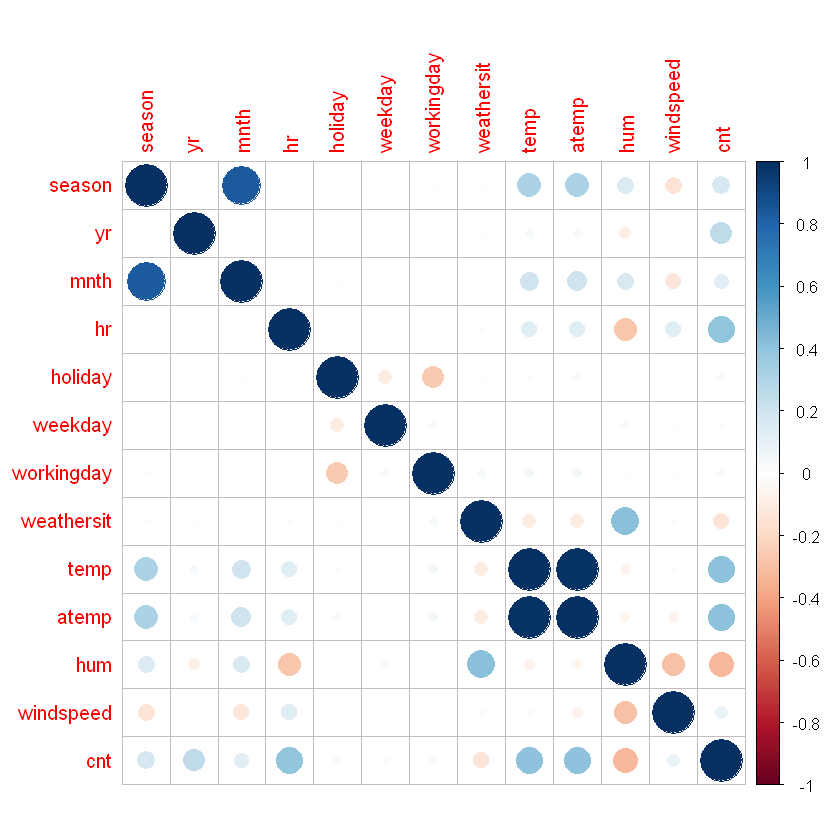

In [204]:
corrplot(BikesData.cor)

In [205]:
## The strongest correlations here are between like/dependent items: month and season, or temp and atemp.
## The best data we can gather is a weaker positive or negative correlation:
## Positively, we see count is affected by the hour, season, month, windspeed, and temp.
## Negatively, we see count is affected by the humidity and weather.

## interestingly, we can also see some other environmental factors: Windspeed and humidity are negatively related, for example!
## Windspeed is also negatively correlated with the season, whereas humidity is positively correlated with the weather.

## Summary

<p>
Likely, we are getting low r-squared rates because we removed two enormously influential factors from our analysis:
<p>
The registered and casual counts.
<p>
However, R cannot build an accurate model when two variables are a perfect fit for a third. So these must be removed to properly examine the role these other variables play on the number of bikes rented. We are still finding moderate correlations in temperature, and weaker correlations in other environmental factors.

### What shall we examine in graphs?

<p>
Moving past our statistical analysis, we'll examine a few things graphically.
<p>
1) Why is the year significant? Do rental counts increase over time? (Perhaps as the business became more popular?)
    <br>
    2) Can we examine the less significant factors visually? What do the numbers tell us?
    <br>
    3) What about time of year? Other factors, such as humidity, temperature, and windspeed, as well as holidays, tend to change seasonally. Where do we draw these lines? Month-by-month? (it would appear not). By Season? By weather trends? By work/school?